In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [31]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [32]:
duplicated_rows = df[df.duplicated()]
print("number of duplicate rows:", duplicated_rows.shape)

number of duplicate rows: (127, 6)


In [33]:
df.drop_duplicates(inplace=True)
df.shape

(9873, 6)

In [34]:
duplicated_rows = df[df.duplicated()]
print("number of duplicate rows:", duplicated_rows.shape)

number of duplicate rows: (0, 6)


In [35]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import sklearn

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [39]:
train = df.drop('Performance Index', axis=1)
target = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [46.48001281 80.2853795  61.06518835 ... 77.08443628 86.24676576
 35.8793377 ]


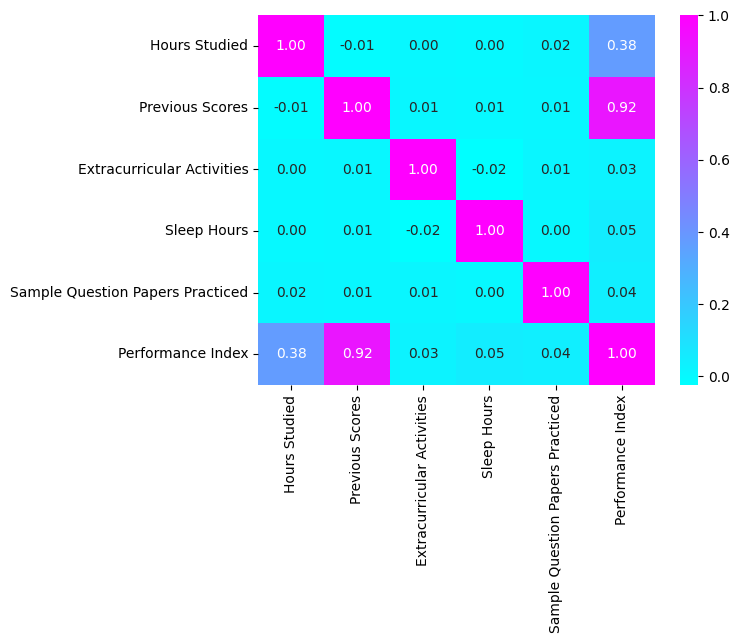

In [40]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='cool', fmt=".2f")
plt.show()

In [41]:
x = df['Previous Scores']
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [42]:
y_test.shape

(2469,)

In [43]:
le = LinearRegression()
le.fit(X_train.values.reshape(-1,1), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = le.predict(X_test.values.reshape(-1,1))

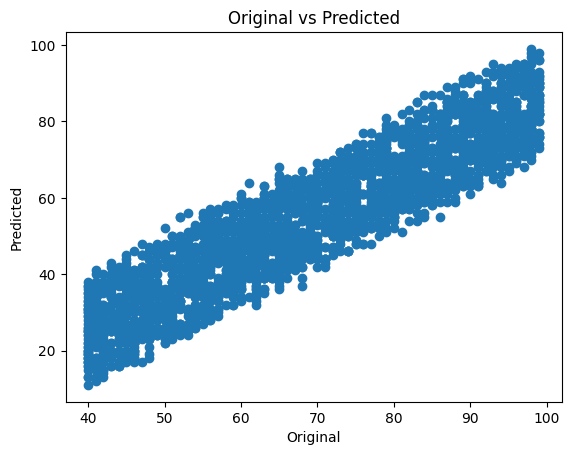

In [45]:
plt.Figure(figsize=(15,10))
plt.scatter(X_test,y_test)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original vs Predicted')
plt.show()
